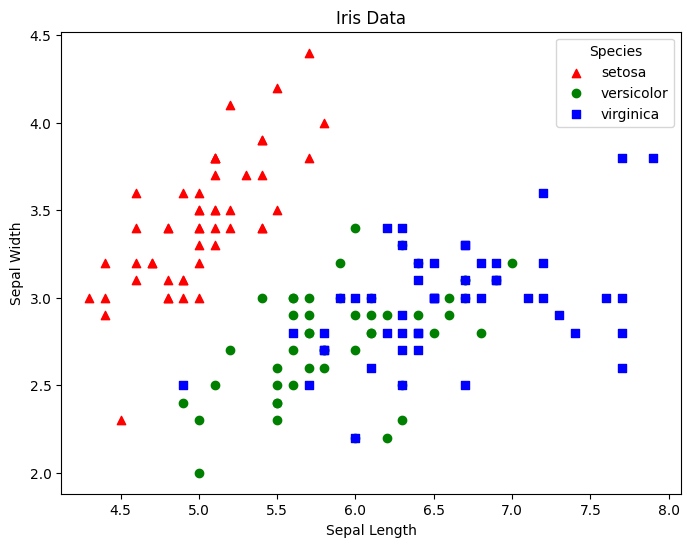

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris['Species'] = iris_data.target

# Define colors and shapes
colours = ['red', 'green', 'blue']
shapes = ['^', 'o', 's']  # '^' for triangle, 'o' for circle, 's' for square

# Plotting
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris['Species'].unique()):
    subset = iris[iris['Species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                color=colours[i], marker=shapes[i], label=iris_data.target_names[species])

# Add title and labels
plt.title('Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add legend
plt.legend(loc='upper right', title="Species")

# Show plot
plt.show()


In [2]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

# Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame

# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model using Sepal.Length and Sepal.Width (first two columns)
X = iris[['sepal length (cm)', 'sepal width (cm)']]
y = iris_data.target
lda.fit(X, y)

# Predict class labels based on Sepal.Length and Sepal.Width
ldapred = lda.predict(X)

# Create a confusion matrix
conf_matrix = confusion_matrix(y, ldapred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[49  1  0]
 [ 0 36 14]
 [ 0 15 35]]


In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix again
conf_matrix = confusion_matrix(y, ldapred)

# Overall error rate
overall_error_rate = 1 - accuracy_score(y, ldapred)

# Class-specific error rates (misclassifications within each class)
class_specific_error_rates = 1 - conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Overall Error Rate: {overall_error_rate:.4f}")
print("Class-Specific Error Rates:")
for i, error_rate in enumerate(class_specific_error_rates):
    print(f"Class {iris_data.target_names[i]}: {error_rate:.4f}")


Confusion Matrix:
[[49  1  0]
 [ 0 36 14]
 [ 0 15 35]]
Overall Error Rate: 0.2000
Class-Specific Error Rates:
Class setosa: 0.0200
Class versicolor: 0.2800
Class virginica: 0.3000


In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Set up cross-validation
skf = StratifiedKFold(n_splits=5)
overall_error_rates_cv = []
class_specific_error_rates_cv = np.zeros((3, 5))  # For 3 classes and 5 splits

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    # Train the LDA model on training data
    lda.fit(X.iloc[train_idx], y[train_idx])
    
    # Predict on the test set
    y_pred = lda.predict(X.iloc[test_idx])
    
    # Calculate confusion matrix for this fold
    conf_matrix_cv = confusion_matrix(y[test_idx], y_pred)
    
    # Overall error rate for this fold
    overall_error_rate_fold = 1 - accuracy_score(y[test_idx], y_pred)
    overall_error_rates_cv.append(overall_error_rate_fold)
    
    # Class-specific error rates for this fold
    class_specific_error_rates_cv[:, fold] = 1 - conf_matrix_cv.diagonal() / conf_matrix_cv.sum(axis=1)

# Average error rates over all folds
avg_overall_error_rate = np.mean(overall_error_rates_cv)
avg_class_specific_error_rates = np.mean(class_specific_error_rates_cv, axis=1)

# Print results
print(f"Average Overall Error Rate (CV): {avg_overall_error_rate:.4f}")
print("Average Class-Specific Error Rates (CV):")
for i, error_rate in enumerate(avg_class_specific_error_rates):
    print(f"Class {iris_data.target_names[i]}: {error_rate:.4f}")


Average Overall Error Rate (CV): 0.1933
Average Class-Specific Error Rates (CV):
Class setosa: 0.0200
Class versicolor: 0.2800
Class virginica: 0.2800


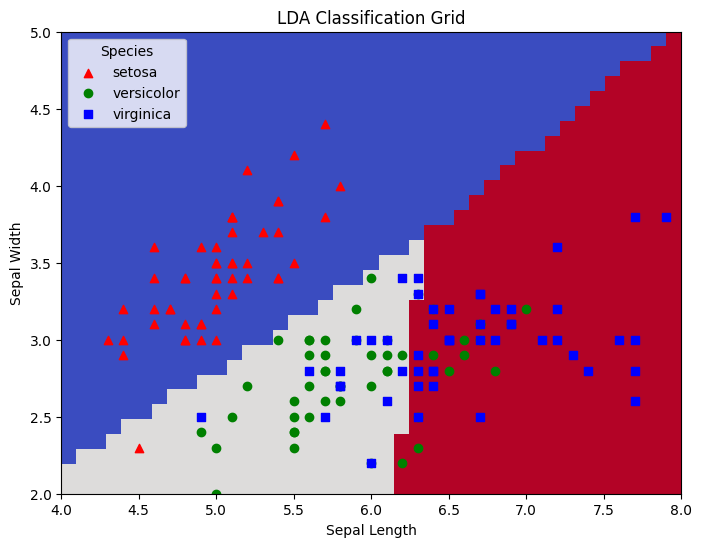

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris['Species'] = iris_data.target

# Define LDA model and fit it
lda = LinearDiscriminantAnalysis()
lda.fit(iris[['sepal length (cm)', 'sepal width (cm)']], iris['Species'])

# Generate lengths and widths sequences
lengths = np.arange(4, 8.1, 0.1)
widths = np.arange(2, 5.1, 0.1)

# Create a grid for class predictions
classgrid = np.zeros((len(lengths), len(widths)))

# Predict class for each point in the grid
for i, length in enumerate(lengths):
    for j, width in enumerate(widths):
        dat = pd.DataFrame({"sepal length (cm)": [length], "sepal width (cm)": [width]})
        classgrid[i, j] = lda.predict(dat)[0]

# Plot the predicted classes as an image
plt.figure(figsize=(8, 6))
plt.imshow(classgrid.T, origin='lower', extent=(4, 8, 2, 5), aspect='auto', cmap='coolwarm')

# Plot the original iris data points on top
colours = ['red', 'green', 'blue']
shapes = ['^', 'o', 's']  # Triangle, circle, square for different species
for i, species in enumerate(iris['Species'].unique()):
    subset = iris[iris['Species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                color=colours[i], marker=shapes[i], label=iris_data.target_names[species])

# Add legend, labels, and title
plt.legend(loc='upper left', title="Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("LDA Classification Grid")

# Show plot
plt.show()


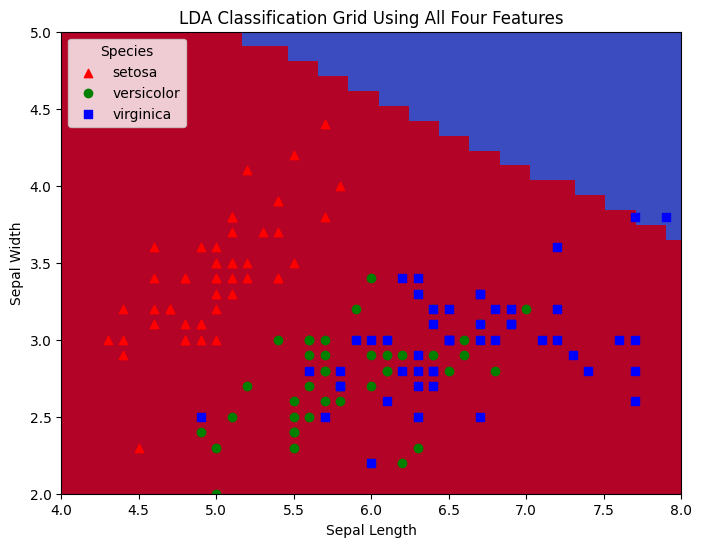

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris['Species'] = iris_data.target

# Define LDA model and fit it using all four measured variables
lda = LinearDiscriminantAnalysis()
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris['Species']
lda.fit(X, y)

# Generate a grid for two of the features (Sepal Length and Sepal Width)
lengths = np.arange(4, 8.1, 0.1)
widths = np.arange(2, 5.1, 0.1)
classgrid = np.zeros((len(lengths), len(widths)))

# For each point in the grid, predict using all four variables, but plot on the 2D grid
for i, length in enumerate(lengths):
    for j, width in enumerate(widths):
        # For each (Sepal Length, Sepal Width) pair, use the average values for the Petal Length and Petal Width
        dat = pd.DataFrame({
            'sepal length (cm)': [length],
            'sepal width (cm)': [width],
            'petal length (cm)': [iris['petal length (cm)'].mean()],  # Use mean Petal Length
            'petal width (cm)': [iris['petal width (cm)'].mean()]     # Use mean Petal Width
        })
        classgrid[i, j] = lda.predict(dat)[0]

# Plot the predicted classes as an image
plt.figure(figsize=(8, 6))
plt.imshow(classgrid.T, origin='lower', extent=(4, 8, 2, 5), aspect='auto', cmap='coolwarm')

# Plot the original iris data points on top
colours = ['red', 'green', 'blue']
shapes = ['^', 'o', 's']  # Triangle, circle, square for different species
for i, species in enumerate(iris['Species'].unique()):
    subset = iris[iris['Species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                color=colours[i], marker=shapes[i], label=iris_data.target_names[species])

# Add legend, labels, and title
plt.legend(loc='upper left', title="Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("LDA Classification Grid Using All Four Features")

# Show plot
plt.show()
